Thyroid Disease Diagnostics

# **Dependencies + Data Prep**

## Import Packages

In [5]:
# install libraries and packages
!pip install klib
!pip install dython
!pip install kds
!pip install keras-sequential-ascii
!pip install git
import pandas as pd
import numpy as np
import klib
import seaborn as sns
import matplotlib.pyplot as plt
import kds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.layers import Input, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import GlorotNormal
from keras.utils import to_categorical
import kds.metrics as metrics
from tensorflow.keras.callbacks import EarlyStopping
from dython.nominal import associations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


## Import Dataset

In [6]:
# load data
df = pd.read_csv('t.csv')
df.columns = df.columns.str.replace(' ', '_')
display(df.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


## Identify Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

GridSpec(6, 6)

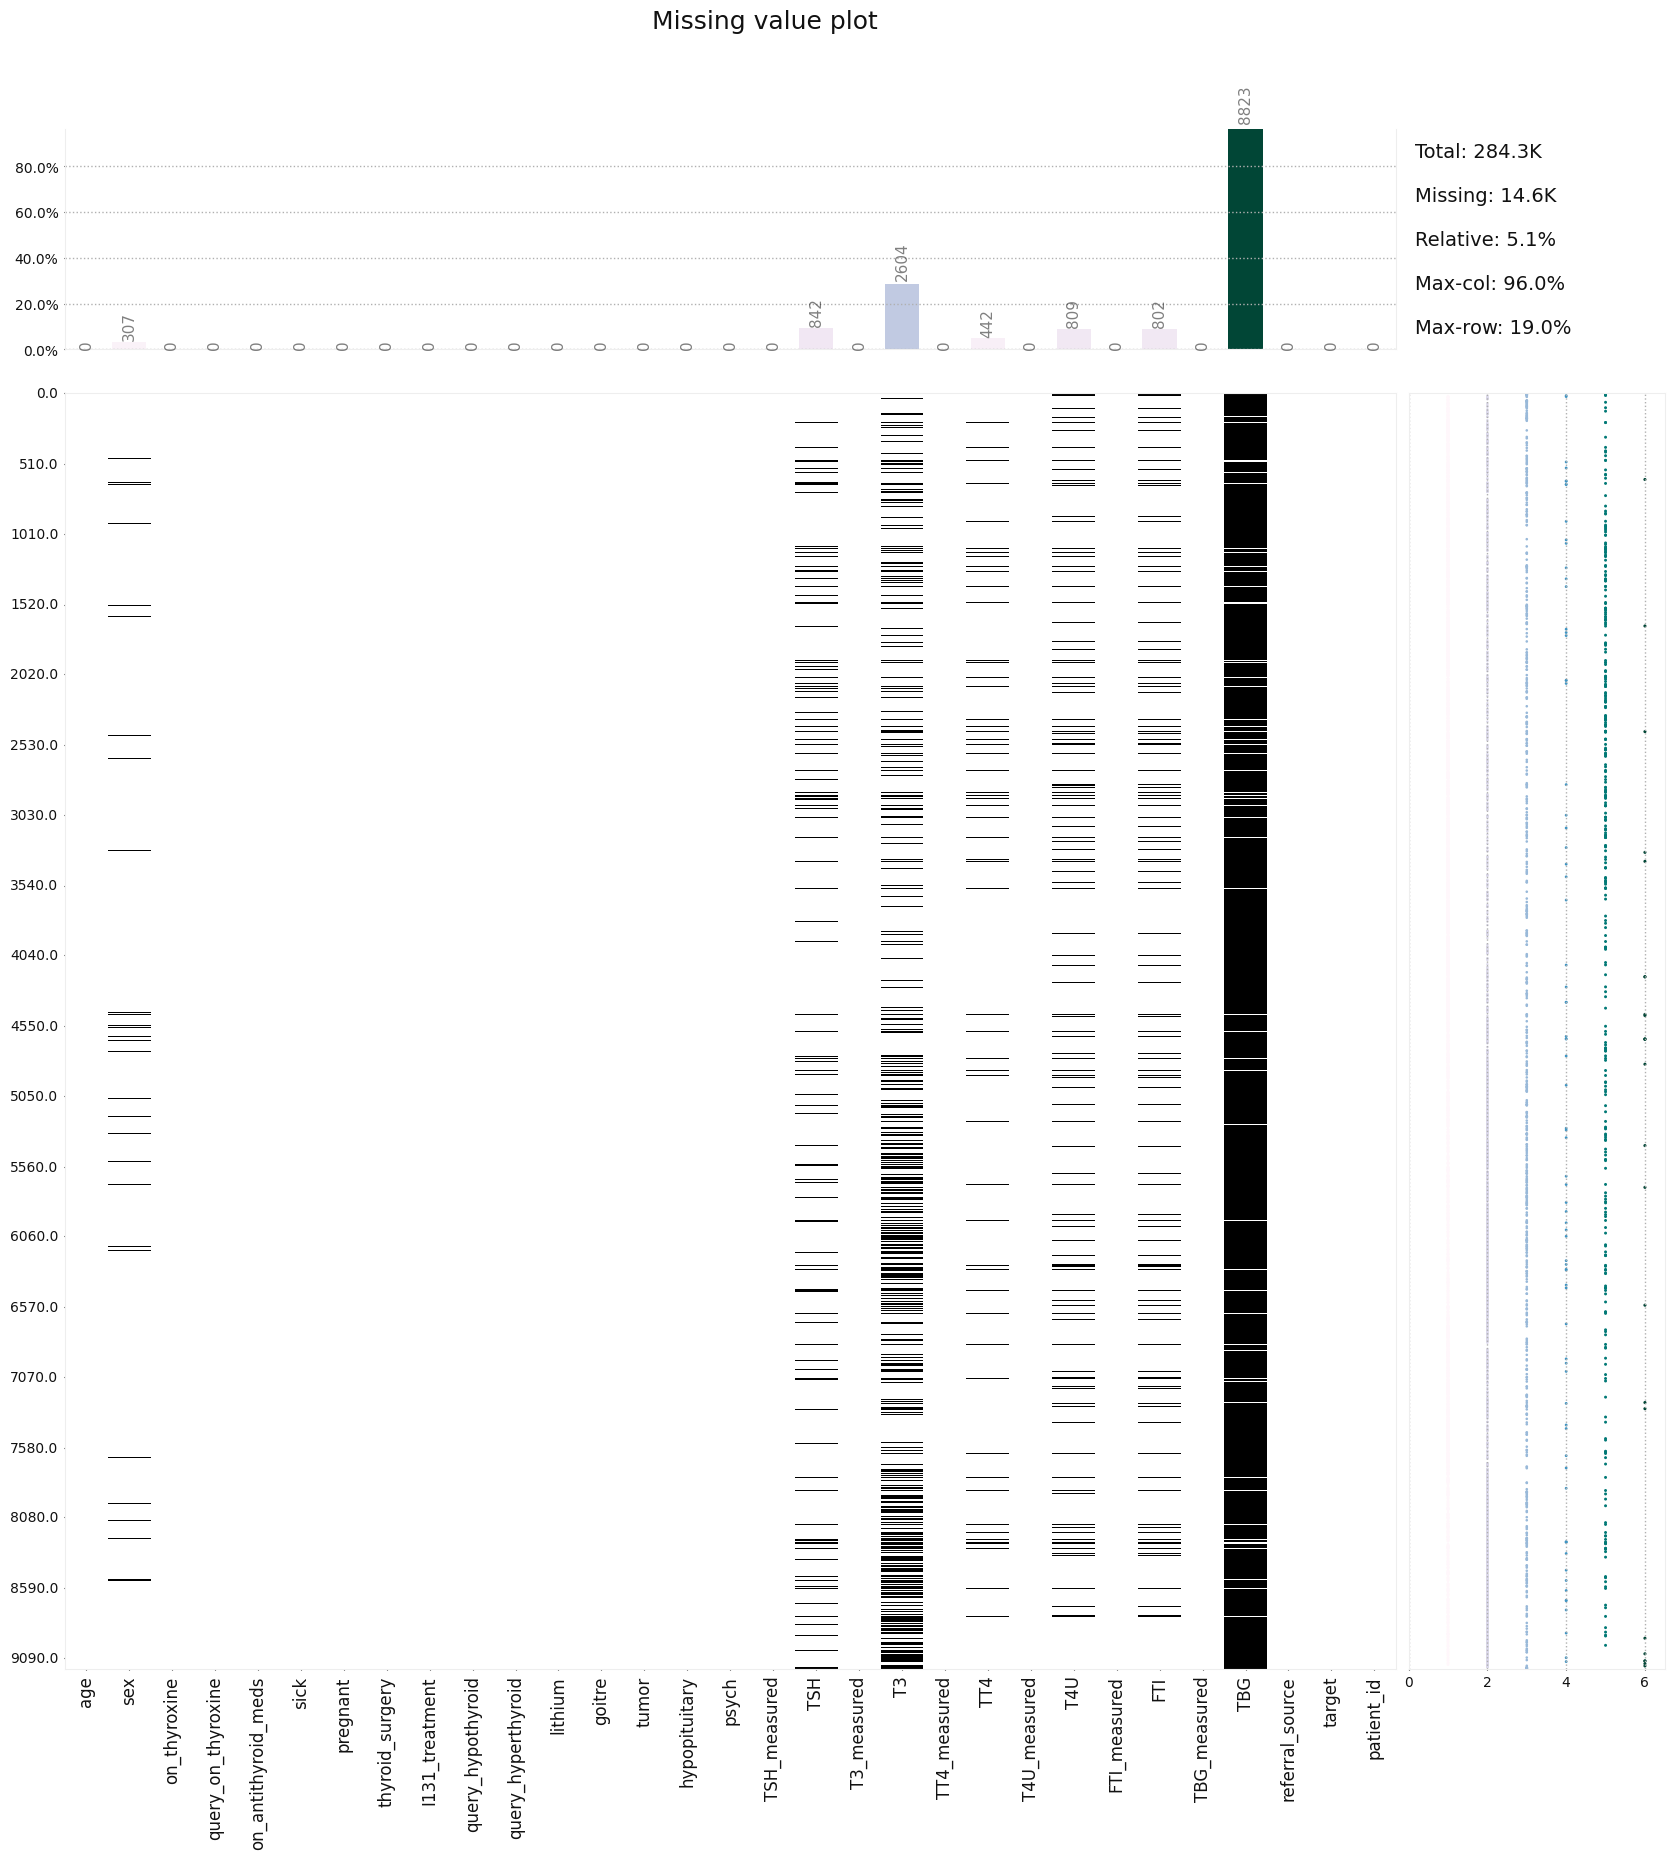

In [7]:
# Identify missing value frequencies:
display(df.info())
df.replace('', np.nan, inplace=True) #replace blanks with np.nan
display(klib.missingval_plot(df))

In [8]:
# Obtain Measure of Centrality:
display(df.describe())
display(df['sex'].mode())
display(df['TSH'].mode())
display(df['T3'].mode())
display(df['TT4'].mode())
display(df['T4U'].mode())
display(df['FTI'].mode())

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


0    F
Name: sex, dtype: object

0    0.1
Name: TSH, dtype: float64

0    1.8
1    2.0
Name: T3, dtype: float64

0    101.0
Name: TT4, dtype: float64

0    0.96
Name: T4U, dtype: float64

0    107.0
Name: FTI, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

GridSpec(6, 6)

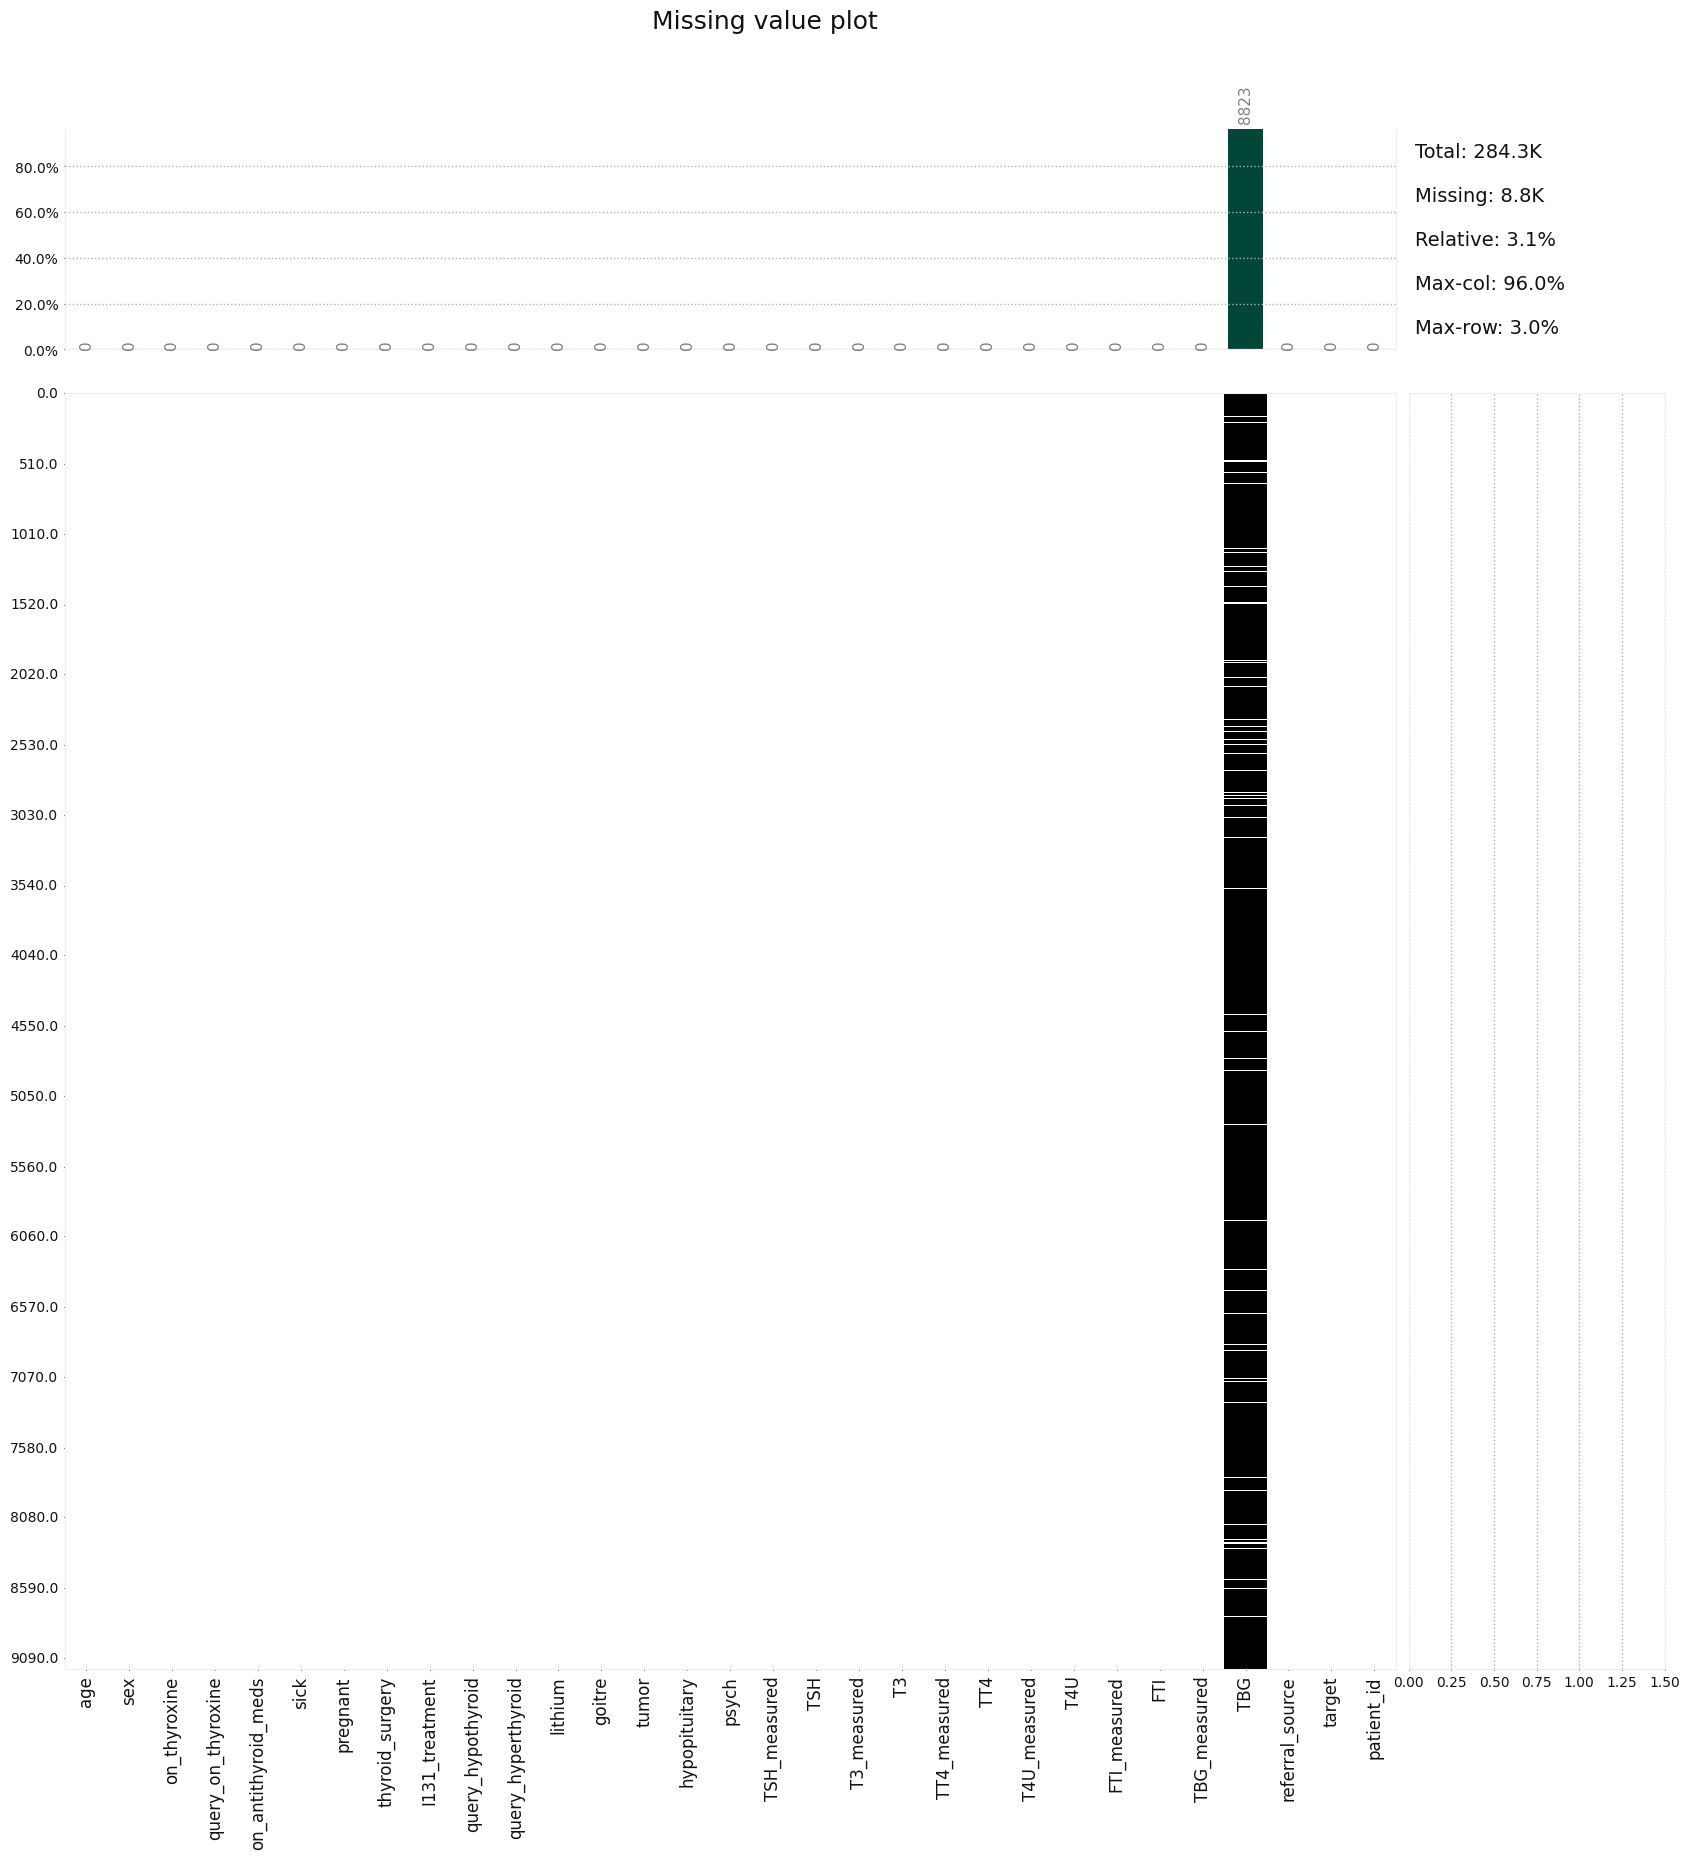

In [9]:
# Replace attribute having <= 40% missing data with appropriate measurement of centrality:
# TBG with >= 80% will be removed later
df['sex'] = df['sex'].replace(np.nan, 'F', regex = True) #Mode
df['TSH'] = df['TSH'].replace(np.nan, '1.4', regex = True) #Median
df['T3'] = df['T3'].replace(np.nan, '1.9', regex = True) #Median
df['TT4'] = df['TT4'].replace(np.nan, '101.0', regex = True) #Mode
df['T4U'] = df['T4U'].replace(np.nan, '0.96', regex = True) #Median
df['FTI'] = df['FTI'].replace(np.nan, '107.0', regex = True) #Median

display(df.info())
display(klib.missingval_plot(df))

In [10]:
# Correct numerical attribute's datatype back to float
df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['FTI'] = df['FTI'].astype(float)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

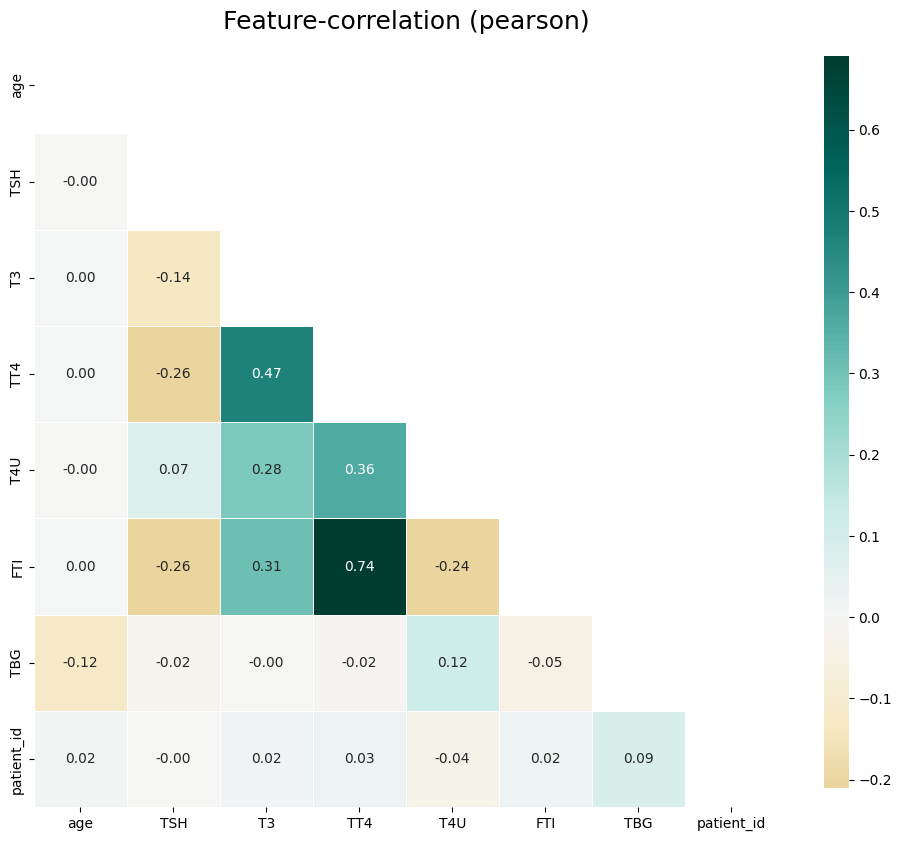

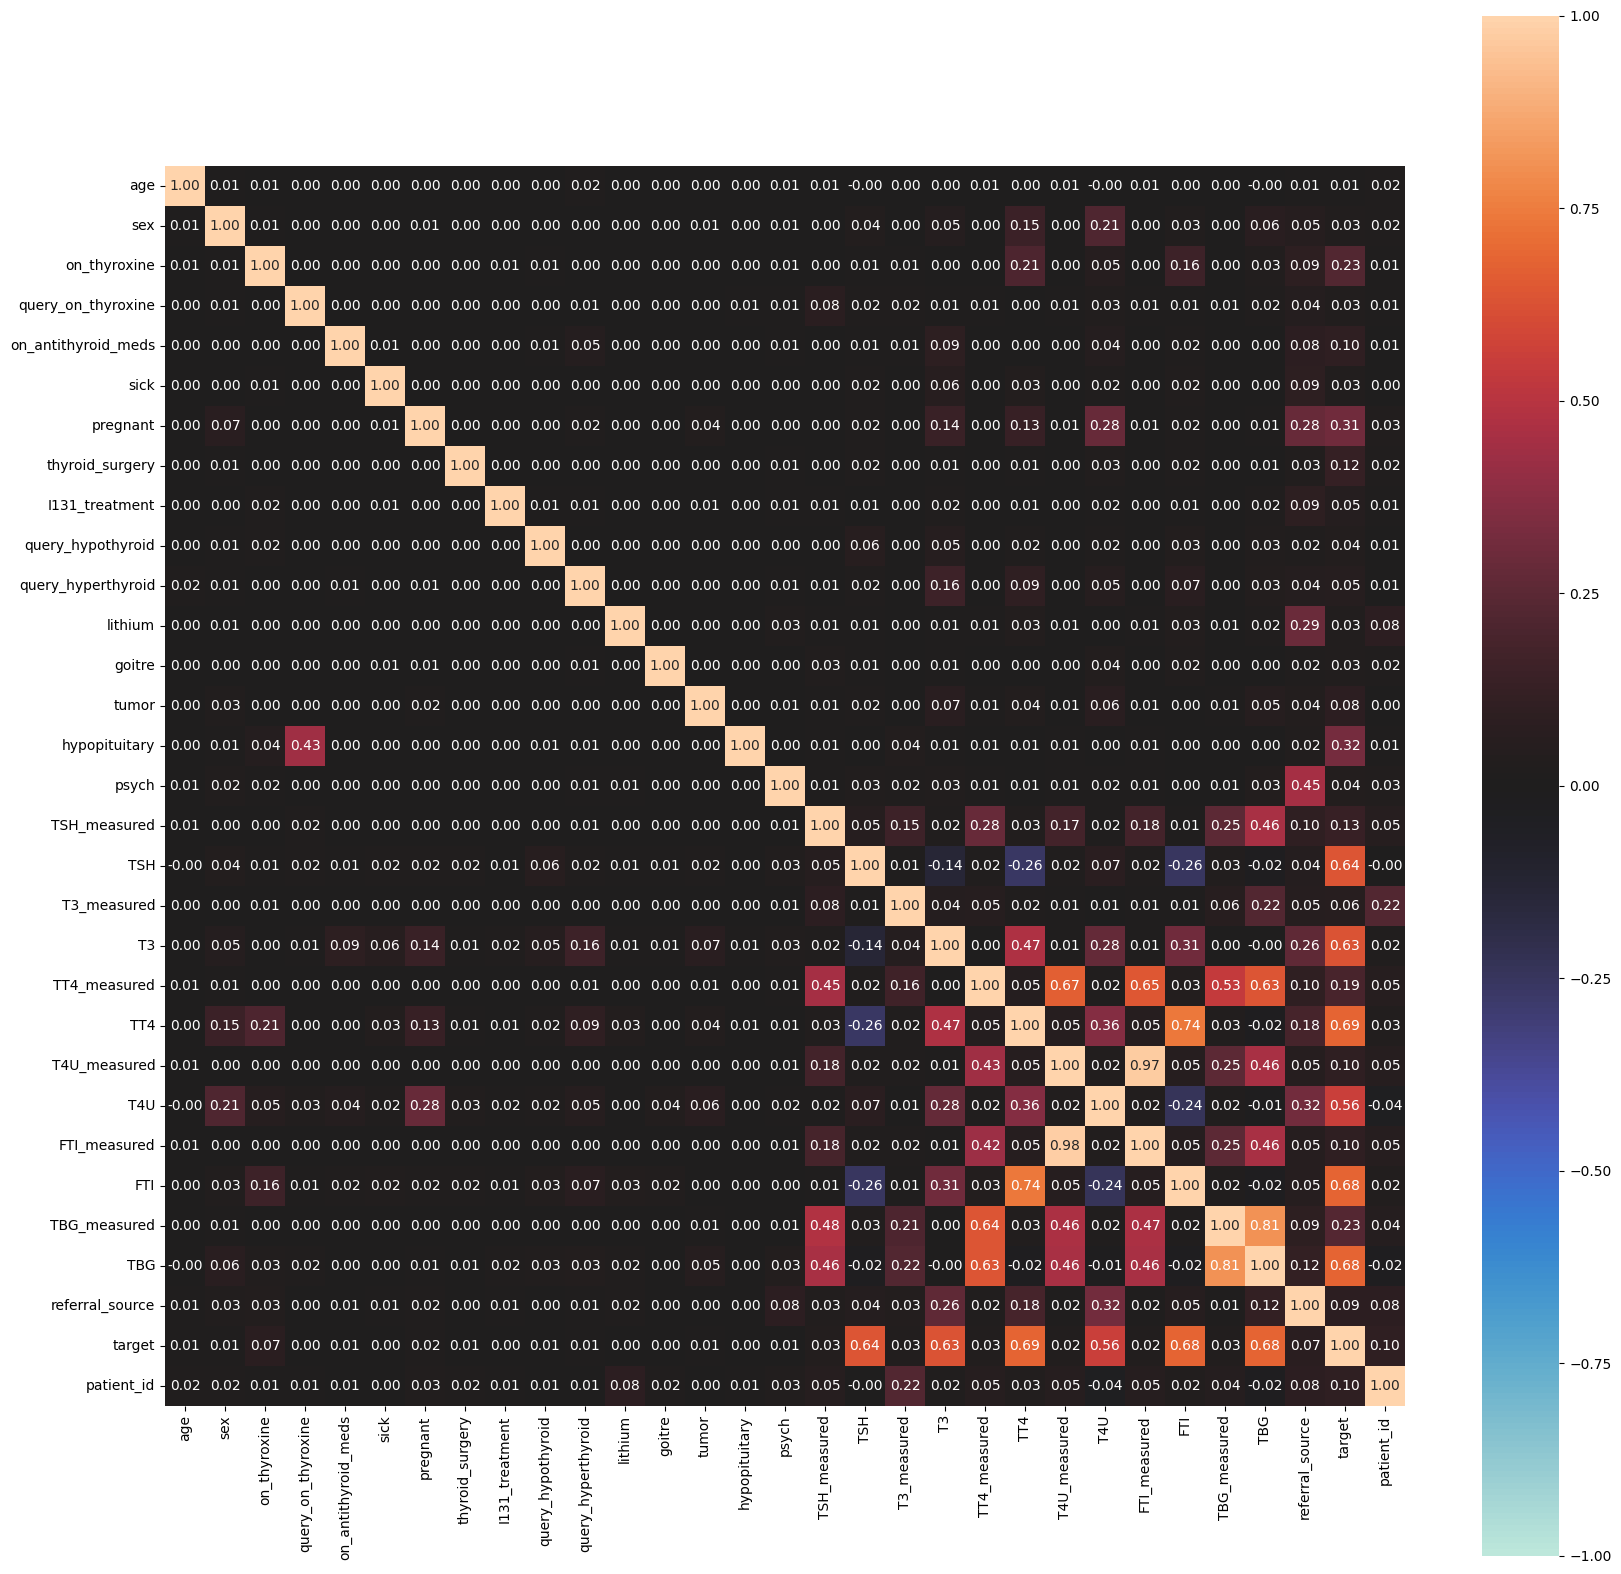

{'corr':                           age       sex  on_thyroxine  query_on_thyroxine  \
 age                  1.000000  0.014178      0.007095            0.002530   
 sex                  0.014178  1.000000      0.008941            0.001546   
 on_thyroxine         0.007095  0.013871      1.000000            0.000082   
 query_on_thyroxine   0.002530  0.011199      0.000385            1.000000   
 on_antithyroid_meds  0.002831  0.004556      0.000874            0.003156   
 sick                 0.002415  0.000255      0.008955            0.000211   
 pregnant             0.003892  0.067135      0.000815            0.001807   
 thyroid_surgery      0.002631  0.011320      0.002001            0.000175   
 I131_treatment       0.001645  0.000511      0.021638            0.003406   
 query_hypothyroid    0.004266  0.010997      0.020558            0.000538   
 query_hyperthyroid   0.017798  0.008833      0.002046            0.002474   
 lithium              0.002361  0.007453      0.000230  

In [11]:
# Correlation matrix for continues features:
klib.corr_plot(df)

# Correlation matric for categorical features:
# Dython library calculates correlation between categorical variables. Method applied is Theil U.
associations(df, nom_nom_assoc = "theil", multiprocessing = True, figsize = (20,20))

In [12]:
# Drop columns that have 80% missing values.
# 'TBG', 'TBG_measured'
# Drop columns that involve the opinion of the patient (queries).
# 'query_hypothyroid', 'query_hyperthyroid'
# Drop columns that are irrelevant to the issue.
#'patient_id', 'referral_source'
# Additionally, the correlation plot above uncovered that T4U_measured and FTI_measured are highly correlated - so lets drop one at random ('T4U_measured').
df = df.drop(['TBG', 'TBG_measured', 'query_hypothyroid',
              'query_hyperthyroid', 'patient_id',
              'referral_source', 'T4U_measured'], axis = 1)

In [13]:
# Final check for missing values:
# create a df that shows Missing vlues as an amount, pecent and then shows the data types.
percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'% N/A': percent, '# N/A': sum, 'Datatype': dtype})
na

,% N/A,# N/A,Datatype
age,0.0,0,int64
sex,0.0,0,object
on_thyroxine,0.0,0,object
query_on_thyroxine,0.0,0,object
on_antithyroid_meds,0.0,0,object
sick,0.0,0,object
pregnant,0.0,0,object
thyroid_surgery,0.0,0,object
I131_treatment,0.0,0,object
lithium,0.0,0,object


## Target Variable Transformation

In [14]:
# Replace target classes "-" to healthy:
df.loc[df["target"] == "-", "target"] = 'HLT'

# Combine appropriate target classes to identify hyperthyrodism:
df.loc[df["target"] == "A", "target"] = 'HeC'
df.loc[df["target"] == "B", "target"] = 'HeC'
df.loc[df["target"] == "C", "target"] = 'HeC'
df.loc[df["target"] == "D", "target"] = 'HeC'
df.loc[df["target"] == "D|R", "target"] = 'HeC'
df.loc[df["target"] == "AK", "target"] = 'HeC'
df.loc[df["target"] == "T", "target"] = 'HeC'
df.loc[df["target"] == "O", "target"] = 'HeC'
df.loc[df["target"] == "P", "target"] = 'HeC'
df.loc[df["target"] == "Q", "target"] = 'HeC'
df.loc[df["target"] == "J", "target"] = 'HeC'
df.loc[df["target"] == "LJ", "target"] = 'HeC'
df.loc[df["target"] == "KJ", "target"] = 'HeC'

# These classes were classified using EDA plot TT4 vs T4U:
df.loc[df["target"] == "L", "target"] = 'HeC'
df.loc[df["target"] == "M", "target"] = 'HeC'
df.loc[df["target"] == "MK", "target"] = 'HeC'
df.loc[df["target"] == "N", "target"] = 'HeC'

# Combine appropriate target classes to identify hypothyrodism:
df.loc[df["target"] == "E", "target"] = 'HoC'
df.loc[df["target"] == "F", "target"] = 'HoC'
df.loc[df["target"] == "FK", "target"] = 'HoC'
df.loc[df["target"] == "G", "target"] = 'HoC'
df.loc[df["target"] == "GKJ", "target"] = 'HoC'
df.loc[df["target"] == "GI", "target"] = 'HoC'
df.loc[df["target"] == "GK", "target"] = 'HoC'
df.loc[df["target"] == "H", "target"] = 'HoC'
df.loc[df["target"] == "H|K", "target"] = 'HoC'
df.loc[df["target"] == "S", "target"] = 'HoC'
df.loc[df["target"] == "I", "target"] = 'HoC'
df.loc[df["target"] == "OI", "target"] = 'HoC'
df.loc[df["target"] == "MI", "target"] = 'HoC'
df.loc[df["target"] == "C|I", "target"] = 'HoC'

# Create others bucket:
df.loc[df["target"] == "K", "target"] = 'Others'
df.loc[df["target"] == "R", "target"] = 'Others'

display(df['target'].unique)

<bound method Series.unique of 0       HLT
1       HLT
2       HLT
3       HLT
4       HoC
       ... 
9167    HLT
9168    HLT
9169    HoC
9170    HLT
9171    HLT
Name: target, Length: 9172, dtype: object>

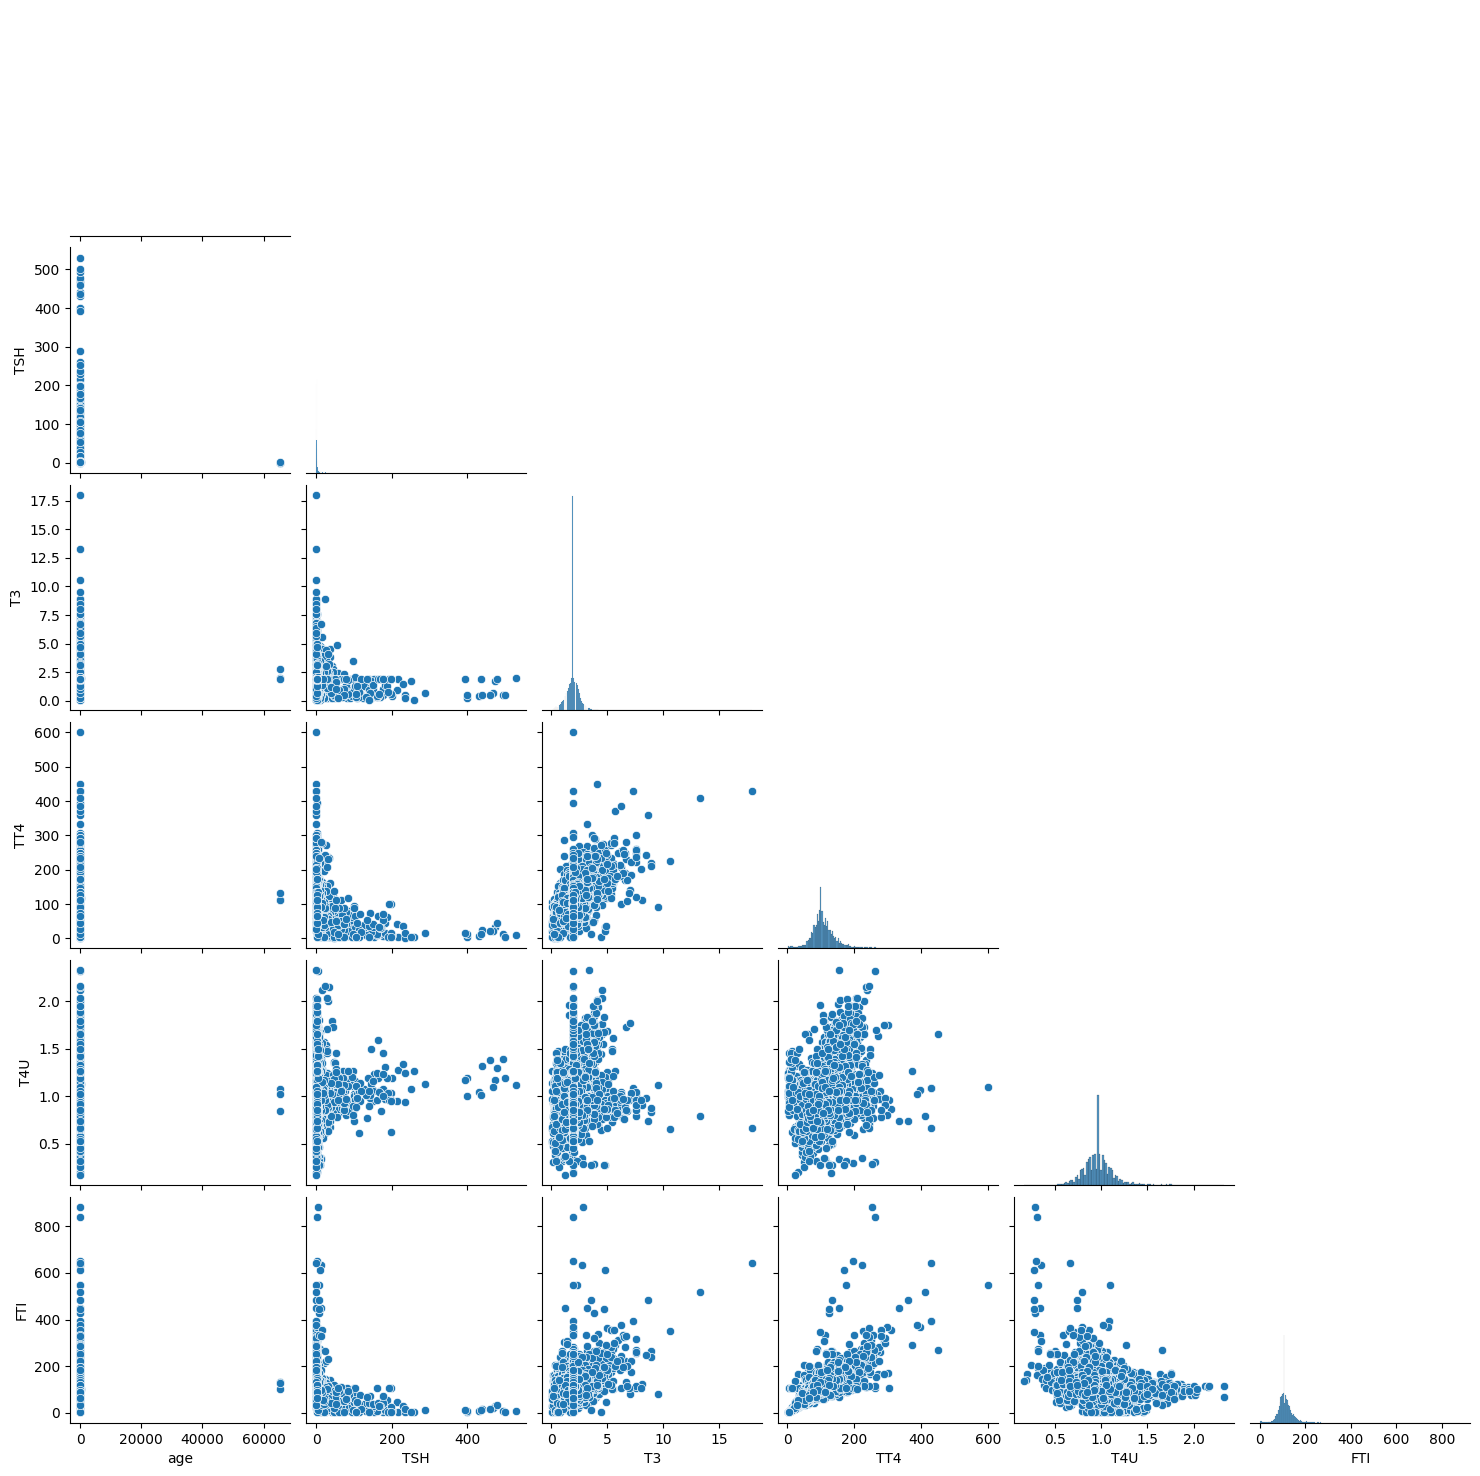

In [15]:
# General Pairplot of continues attributes:
# This plot was used to find a plot of analytes with a fairly spread-out population for target transformation:
sns.pairplot(df, corner=True)

Text(0.5, 1.0, 'Target Frequencies by Gender')

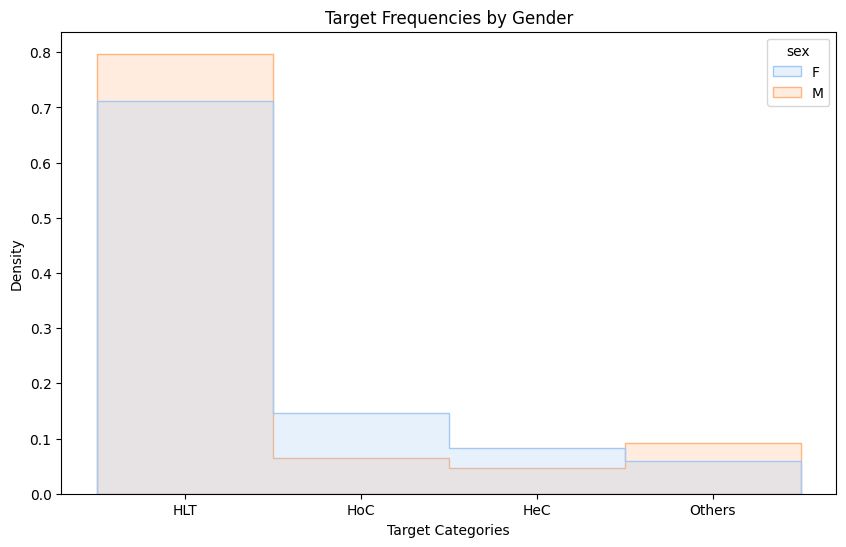

In [16]:
### Target Frequencies by Gender:
sns.histplot(data=df, x="target", hue="sex", stat="density",
             element="step", palette = "pastel",
             common_norm=False)

plt.gcf().set_size_inches(10, 6)
plt.xlabel('Target Categories')
plt.ylabel('Density')
plt.title("Target Frequencies by Gender")

Text(0.5, 1.0, 'TT4 Relation to T4U Differentiated by target')

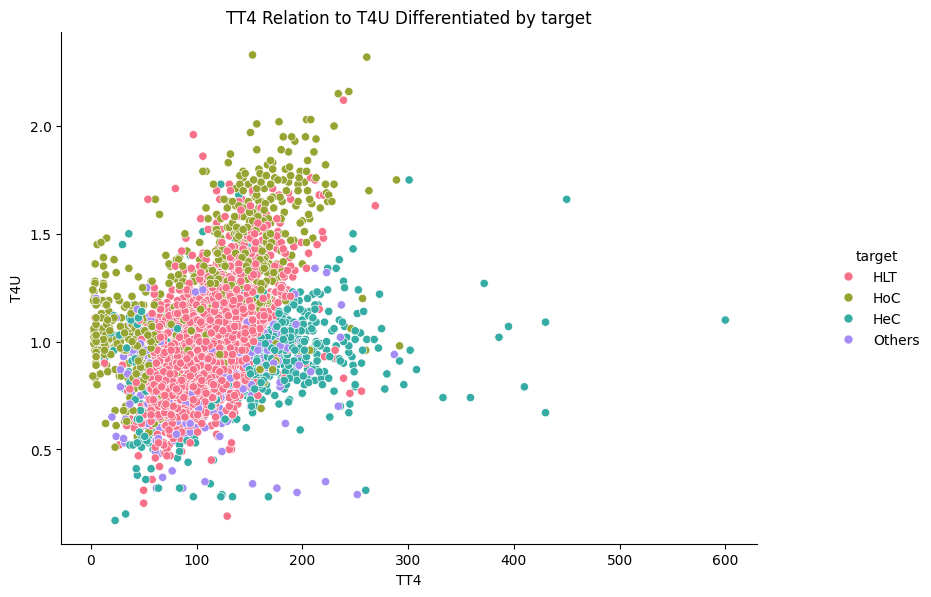

In [17]:
# TT4 Relation to T4U Differentiated by target:
# Plot used to categorize the different classes of the Target variable to either Hyper-, Hypo-, & others.
sns.relplot(data=df, x="TT4", y="T4U", hue="target", palette = "husl",
           kind="scatter")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('TT4')
plt.ylabel('T4U')
plt.title("TT4 Relation to T4U Differentiated by target")

Text(0.5, 1.0, 'TSH Relation to target by Gender')

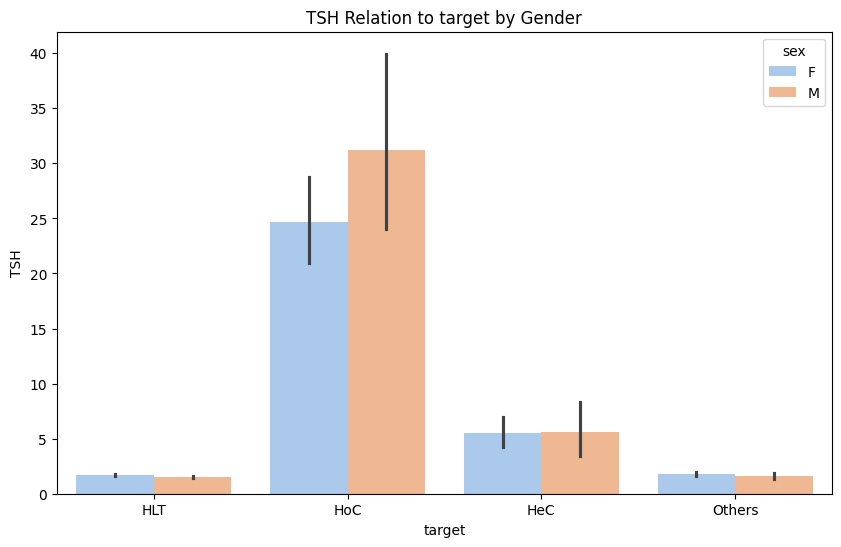

In [18]:
# TSH Relation to target by Gender
sns.barplot(data=df, x="target", y="TSH", hue="sex", palette = "pastel")
plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TSH')
plt.title("TSH Relation to target by Gender")

Text(0.5, 1.0, 'TT4 Relation to target by Gender')

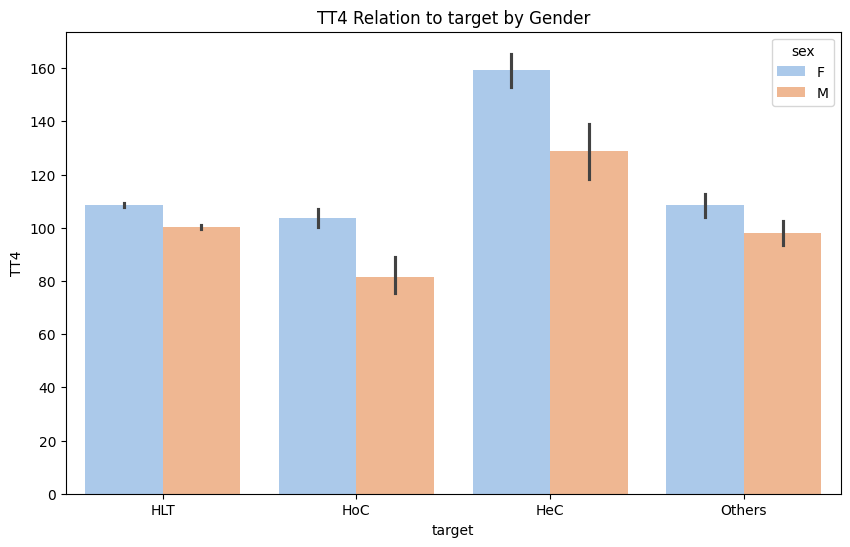

In [19]:
# TT4 Relation to target by Gender
sns.barplot(data=df, x="target", y="TT4", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TT4')
plt.title("TT4 Relation to target by Gender")

Text(0.5, 1.0, 'T4U Relation to target by Gender')

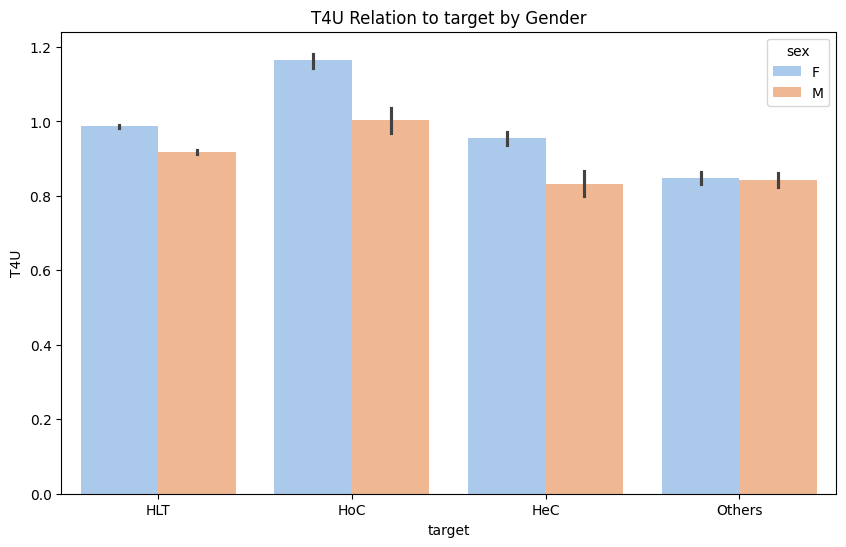

In [20]:
# T4U Relation to target by Gender
sns.barplot(data=df, x="target", y="T4U", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('T4U')
plt.title("T4U Relation to target by Gender")

Text(0.5, 1.0, 'FTI Relation to target by Gender')

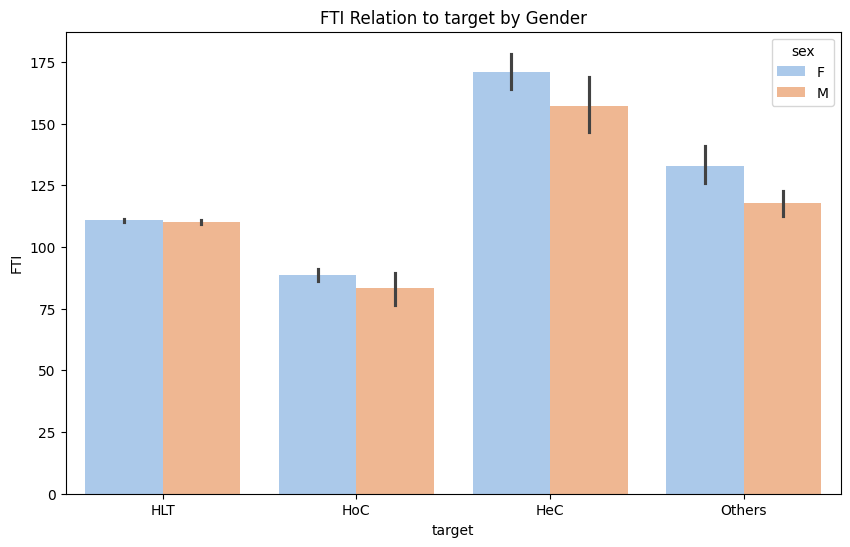

In [21]:
# FTI Relation to target by Gender
sns.barplot(data=df, x="target", y="FTI", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('FTI')
plt.title("FTI Relation to target by Gender")

# **Data Transformation**

## Variables Transformation

In [22]:
# change age to float because it is continuous
df['age'] = df['age'].astype(float)
# scale using Standard Scaler():
# this scales based on a normal distrobution
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

In [23]:
# 'sex' should be an int with only 0's and 1's
display(df['sex'].value_counts())
# Use Label encoder to convert the data values
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex'].value_counts()

sex
F    6380
M    2792
Name: count, dtype: int64

sex
0    6380
1    2792
Name: count, dtype: int64

In [24]:
# lets transform the rest of the boolean features in the same manner as we did for sex
# they are all currently objects so lets retrieve them this way and transform them all with the label encoder in a similar manner to 'sex'
display("On Thyroxine:", df['on_thyroxine'].value_counts())
dtype_obj = df.select_dtypes(include=['object']).columns.tolist()
# loop through each column to use Label Encoder to convert to int
for col in dtype_obj:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# loop through each column to show that the transformation was successful
for col in dtype_obj:
    x = df[col].value_counts()
    print(x)

'On Thyroxine:'

on_thyroxine
f    7932
t    1240
Name: count, dtype: int64

on_thyroxine
0    7932
1    1240
Name: count, dtype: int64
query_on_thyroxine
0    9019
1     153
Name: count, dtype: int64
on_antithyroid_meds
0    9056
1     116
Name: count, dtype: int64
sick
0    8828
1     344
Name: count, dtype: int64
pregnant
0    9065
1     107
Name: count, dtype: int64
thyroid_surgery
0    9038
1     134
Name: count, dtype: int64
I131_treatment
0    9003
1     169
Name: count, dtype: int64
lithium
0    9079
1      93
Name: count, dtype: int64
goitre
0    9088
1      84
Name: count, dtype: int64
tumor
0    8931
1     241
Name: count, dtype: int64
hypopituitary
0    9170
1       2
Name: count, dtype: int64
psych
0    8754
1     418
Name: count, dtype: int64
TSH_measured
1    8330
0     842
Name: count, dtype: int64
T3_measured
1    6568
0    2604
Name: count, dtype: int64
TT4_measured
1    8730
0     442
Name: count, dtype: int64
FTI_measured
1    8370
0     802
Name: count, dtype: int64
target
0    6771
2    1113
1     656
3     632
Name: count, dtype: int64


## Drop Redundant Attributes

In [25]:
# drop redundant columns
# the columns including 'measured' were dropped because they are the boolean data type representing the same information as the float values. Meaning these columns are less informative
columns_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'FTI_measured']
df= df.drop(columns=columns_to_drop).copy()

## Final Dataframe

In [26]:
# final dataframe post preparation + transformation
# show the datafame after transformations
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,-0.037634,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,1.9,101.0,0.96,107.0,0
1,-0.037634,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.96,107.0,0
2,-0.027499,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,0
3,-0.031722,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,0
4,-0.035100,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,-0.014829,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,64.0,0.83,77.0,0
9168,-0.043547,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,91.0,0.92,99.0,0
9169,-0.003848,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,113.0,1.27,89.0,2
9170,-0.022431,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,75.0,0.85,88.0,0


# **Partition Dataset to Train Set and Validation Set**

The training set will be used to train the model, the validation set will be used along with cross validation to find the optimal hyperparameter and avoid data leakage that would be caused if the testing set is used. The testing set is used to measure the performance of the model and gauge if it is ready for deployment.

In [27]:
# identify target variable (y) and predictor variables (X)
y = df['target']
y
# remove the taret variable column to prevent data leakage and aid modeling
X = df.drop(['target'], axis = 1)
X.shape

(9172, 19)

In [28]:
# set random seed + partition data into 40% train, 30% validation, and 30% test
np.random.seed(22)
# create training sets
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.4)
# split the remaining rows into the validation and testing sets
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, train_size=.5)
print("X_train shape:", X_train.shape, "X_valid shape:", X_valid.shape, "X_test shape:", X_test.shape)

X_train shape: (3668, 19) X_valid shape: (2752, 19) X_test shape: (2752, 19)


In [29]:
# print intial shapre of each paritioned set
print("y_train shape:", y_train.shape, "y_valid shape:", y_valid.shape, "y_test shape:", y_test.shape)

y_train shape: (3668,) y_valid shape: (2752,) y_test shape: (2752,)


# **Standardize Train Data Sets**

In [30]:
# y_train copy:
y_train_c = y_train.copy()

# Standardize train data:
X_train_std = pd.DataFrame(stats.zscore(X_train))
display(X_train_std.head())

# Standardize valid data:
X_valid_std = pd.DataFrame(stats.zscore(X_valid))
X_valid_std.replace(np.nan, 0, inplace=True)
display(X_valid_std.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
7189,-0.009368,-0.682233,-0.387561,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.078599,-0.987559,-0.825685,-1.271425,-0.145949
6587,-0.036193,-0.682233,2.580236,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.152366,0.470539,1.332652,0.371345,0.948227
8999,-0.020490,-0.682233,-0.387561,-0.139482,-0.110187,5.196152,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.198593,-0.059678,-0.142667,0.422681,-0.400408
6935,-0.038156,-0.682233,-0.387561,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.108106,0.470539,0.731596,0.011989,0.642876
5888,-0.028996,-0.682233,2.580236,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.083517,-0.059678,0.239823,-1.066078,0.973673


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
8926,-1.064748,1.541651,2.450009,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,-0.161601,-0.500099,0.429612,-0.055054,0.366305
8937,-0.328656,1.541651,-0.408162,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,-0.046267,0.329372,0.401956,-0.371135,0.560845
6779,1.830547,-0.648655,-0.408162,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,-0.135971,-0.500099,-0.483039,-0.055054,-0.460492
1281,-1.849913,-0.648655,-0.408162,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,-0.157330,-0.085363,-0.206478,-0.055054,-0.168681
7036,0.260218,-0.648655,2.450009,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,0.210030,-0.085363,-0.759599,-0.160414,-0.679350


# **Rebalance Train Dataset**

In [31]:
# Determine cluster train sample balance:
unique, counts = np.unique(y_train, return_counts=True)
class_frequency_counts = {
    unique[0]: counts[0],
    unique[1]: counts[1],
    unique[2]: counts[2],
    unique[3]: counts[3]
}

class_frequency_counts

{0: 2717, 1: 246, 2: 440, 3: 265}

In [32]:
# Train set resample/balanced:
oversample = RandomOverSampler(sampling_strategy='auto')
X_train_over, y_train_over = oversample.fit_resample(X_train_std, y_train_c)

# Show resampled frequency:
unique, counts = np.unique(y_train_over, return_counts=True)
oversampled_class_frequency_counts = {
    unique[0]: counts[0],
    unique[1]: counts[1],
    unique[2]: counts[2],
    unique[3]: counts[3]
}

oversampled_class_frequency_counts

{0: 2717, 1: 2717, 2: 2717, 3: 2717}

## Final Train dataset: Standardized and Rebalanced

>X_train_over
>
>y_train_over
>
>X_valid_std
>
>y_valid


# **Creation of Models**

## **Random Forest**

### Create + Fit Model
### The numbers in the below lists were chosen at random and then iterated through in order to find the optimal value for increasing model accuracy.
### To account for overfitting, the lowest value for each was chosen assuming accuracy remained the same. This ensures that the random forest trees are as small as possible without compromising accuracy.

In [33]:
# Use cross validation to find the optimal hyperparemeters
n_estimators = [10, 30, 50, 70, 90, 110, 130, 160, 190, 220, 250]
max_d = [5, 7, 10, 13, 15, 18, 20, 22, 25]
## I want to limit max_depth to prevent overiftting. This is the lowest depth that still recorded max perfromace - a 92% weighted average in the three metrics.
minsplit = [2, 3, 4, 5]
# everything over 3 has reduced performance. Chose lowest to reduce overfitting
minleaf = [1, 2, 3, 4]

for nn in minleaf:
  rf = RandomForestClassifier(
    n_estimators=110,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None  # You can specify custom class weights if needed
)

# fit model + create classification report
  xxx = rf.fit(X_valid, y_valid)
  yyy = xxx.predict(X_test)
  print(pd.Series(yyy).value_counts())
  print(classification_report(y_test,yyy))

0    2122
2     286
1     181
3     163
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2018
           1       0.86      0.75      0.80       209
           2       0.88      0.74      0.81       339
           3       0.80      0.70      0.74       186

    accuracy                           0.91      2752
   macro avg       0.87      0.79      0.82      2752
weighted avg       0.91      0.91      0.91      2752

0    2121
2     283
1     183
3     165
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2018
           1       0.87      0.77      0.82       209
           2       0.90      0.75      0.82       339
           3       0.79      0.70      0.74       186

    accuracy                           0.91      2752
   macro avg       0.87      0.80      0.83      2752
weighted avg       0.91      0.91      0.91      2752

### Initiate Model
### Plug in the optimal values found in the code above.

In [34]:
# initiate model with hyperparameters
rf = RandomForestClassifier(
    n_estimators=110,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None
)

### Predict with Model
### fit to the train data. predict on the test data. print the model performance metrics.

In [35]:
# obtain predictions + create classification report
model_randomforest = rf.fit(X_train, y_train)
predictions_rf = model_randomforest.predict(X_test)
print(pd.Series(predictions_rf).value_counts())
print(classification_report(y_test,predictions_rf))

0    2091
2     286
1     194
3     181
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2018
           1       0.87      0.80      0.83       209
           2       0.91      0.76      0.83       339
           3       0.81      0.78      0.80       186

    accuracy                           0.92      2752
   macro avg       0.88      0.83      0.85      2752
weighted avg       0.92      0.92      0.92      2752



LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,2.0,3.0,2.656,276.0,617.0,38.0,144.5,738,223.551,276.0,617.0,738,38.0,10.029,42.699,51.073,1.883,40.816,4.258
1,2,1.0,2.0,1.695,275.0,445.0,17.0,144.5,524,161.818,551.0,1062.0,1262,55.0,20.022,73.495,87.336,2.725,70.770,3.671
2,3,0.0,1.0,0.400,275.0,136.0,160.0,144.5,183,49.455,826.0,1198.0,1445,215.0,30.015,82.907,100.000,10.654,72.253,2.762
3,4,0.0,0.0,0.000,275.0,41.0,255.0,144.5,0,14.909,1101.0,1239.0,1445,470.0,40.007,85.744,100.000,23.290,62.454,2.143
4,5,0.0,0.0,0.000,275.0,46.0,253.0,144.5,0,16.727,1376.0,1285.0,1445,723.0,50.000,88.927,100.000,35.828,53.099,1.779
5,6,0.0,0.0,0.000,276.0,36.0,261.0,144.5,0,13.043,1652.0,1321.0,1445,984.0,60.029,91.419,100.000,48.761,42.658,1.523
6,7,0.0,0.0,0.000,275.0,36.0,254.0,144.5,0,13.091,1927.0,1357.0,1445,1238.0,70.022,93.910,100.000,61.348,32.562,1.341
7,8,0.0,0.0,0.000,275.0,33.0,259.0,144.5,0,12.000,2202.0,1390.0,1445,1497.0,80.015,96.194,100.000,74.182,22.012,1.202
8,9,0.0,0.0,0.000,275.0,22.0,263.0,144.5,0,8.000,2477.0,1412.0,1445,1760.0,90.007,97.716,100.000,87.215,10.501,1.086
9,10,0.0,0.0,0.000,275.0,33.0,258.0,144.5,0,12.000,2752.0,1445.0,1445,2018.0,100.000,100.000,100.000,100.000,0.000,1.000


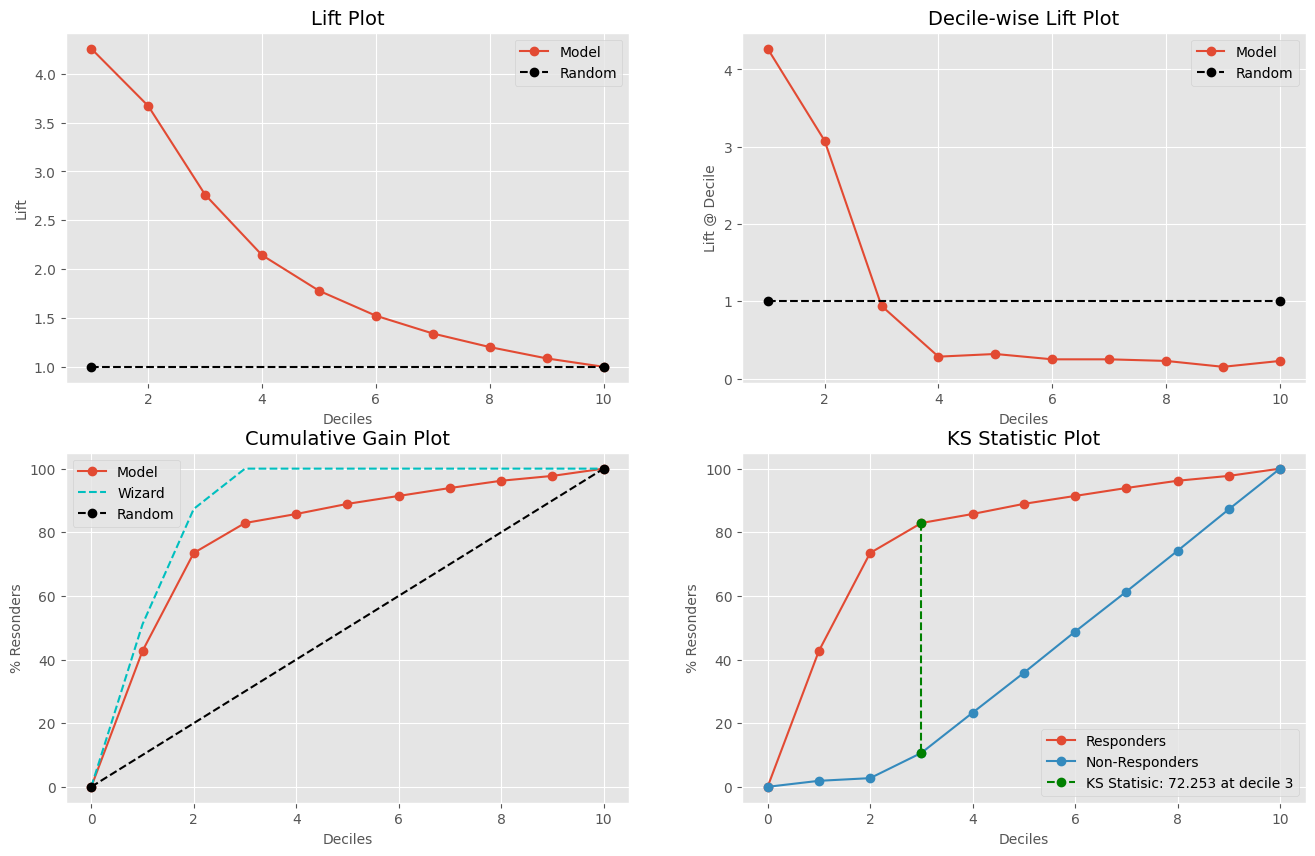

In [36]:
# cetrics report using kds.metrics.report
# Below visuals include a lift plot. A positive sign is a line above that of random. In this case it is clearly above the line which is great.
metrics.report(y_test, predictions_rf, plot_style='ggplot')

## **Logistic Regression CV**

### Create + Fit Model

In [37]:
# LogisticRegressionCV with L2 penalty (solver='lbfgs', cv=5, max_iter=500):
lr_CV = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500)
lr_CV.fit(X_train_over, y_train_over)

# Print intercept and coefficients:
print('intercept ', lr_CV.intercept_)
print(pd.DataFrame({'coeff': lr_CV.coef_[0]}, index=X.columns))

intercept  [ 0.59995059 -0.24719191  0.2636298  -0.61638847]
                        coeff
age                  0.205544
sex                  0.071713
on_thyroxine         0.203965
query_on_thyroxine  -0.009772
on_antithyroid_meds -0.042492
sick                -0.018107
pregnant            -0.032821
thyroid_surgery      0.292477
I131_treatment      -0.003919
lithium              0.137287
goitre               0.083250
tumor               -0.055877
hypopituitary       -0.056401
psych                0.274549
TSH                 -3.604051
T3                   0.302581
TT4                 -0.103377
T4U                 -0.064580
FTI                 -0.540024


### Obtain Predictions with Model

In [38]:

# Predictions on validation set:
lr_CV_pred = lr_CV.predict(X_valid_std)

lrCV_pred_result = pd.DataFrame({'Predicted': lr_CV_pred, 'Actual': y_valid})
display(lrCV_pred_result.head())

# Confusion matrix:
display(pd.crosstab(y_valid, lr_CV_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Classification report:
print(classification_report(y_valid,lr_CV_pred))

,Predicted,Actual
8926,0,0
8937,0,0
6779,0,0
1281,2,0
7036,1,1


Predicted,0,1,2,3,All
True,,,,,
0,1319,212,235,270,2036
1,13,164,5,19,201
2,43,21,247,23,334
3,26,12,3,140,181
All,1401,409,490,452,2752


              precision    recall  f1-score   support

           0       0.94      0.65      0.77      2036
           1       0.40      0.82      0.54       201
           2       0.50      0.74      0.60       334
           3       0.31      0.77      0.44       181

    accuracy                           0.68      2752
   macro avg       0.54      0.74      0.59      2752
weighted avg       0.81      0.68      0.71      2752



### Create Metrics Report

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.608,1.000,0.799,276.0,169.0,121.0,141.2,733,61.232,276.0,169.0,733,121.0,10.029,11.969,51.912,5.943,6.026,1.193
1,2,0.253,0.607,0.425,275.0,163.0,192.0,141.2,514,59.273,551.0,332.0,1247,313.0,20.022,23.513,88.314,15.373,8.140,1.174
2,3,0.132,0.253,0.184,275.0,121.0,218.0,141.2,165,44.000,826.0,453.0,1412,531.0,30.015,32.082,100.000,26.081,6.001,1.069
3,4,0.090,0.131,0.108,275.0,84.0,236.0,141.2,0,30.545,1101.0,537.0,1412,767.0,40.007,38.031,100.000,37.672,0.359,0.951
4,5,0.066,0.089,0.076,275.0,68.0,242.0,141.2,0,24.727,1376.0,605.0,1412,1009.0,50.000,42.847,100.000,49.558,-6.711,0.857
5,6,0.050,0.066,0.058,276.0,68.0,242.0,141.2,0,24.638,1652.0,673.0,1412,1251.0,60.029,47.663,100.000,61.444,-13.781,0.794
6,7,0.036,0.050,0.043,275.0,49.0,252.0,141.2,0,17.818,1927.0,722.0,1412,1503.0,70.022,51.133,100.000,73.821,-22.688,0.730
7,8,0.022,0.036,0.029,275.0,123.0,222.0,141.2,0,44.727,2202.0,845.0,1412,1725.0,80.015,59.844,100.000,84.725,-24.881,0.748
8,9,0.006,0.022,0.014,275.0,316.0,149.0,141.2,0,114.909,2477.0,1161.0,1412,1874.0,90.007,82.224,100.000,92.043,-9.819,0.914
9,10,0.000,0.006,0.001,275.0,251.0,162.0,141.2,0,91.273,2752.0,1412.0,1412,2036.0,100.000,100.000,100.000,100.000,0.000,1.000


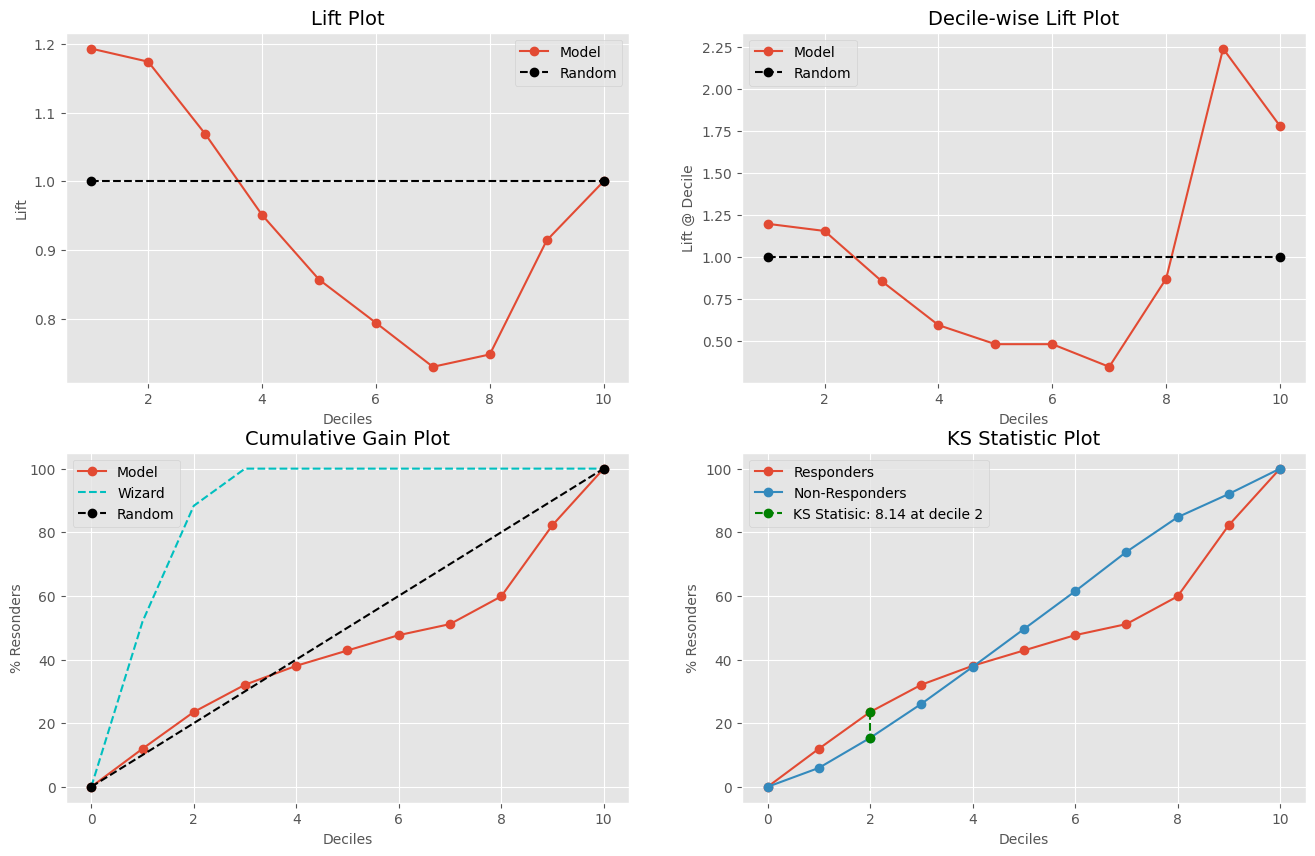

In [39]:
# Metrics Report:
lr_CV_prob = lr_CV.predict_proba(X_valid_std)

kds.metrics.report(y_valid,lr_CV_prob[:,1],plot_style='ggplot')

## **Neural Network**

### Create + Compile Model

In [40]:
# set random seed
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
# define number of classess for model
num_classes = 4

# define the neural network model
NN_model = Sequential()
NN_model.add(Dense(64, activation='relu', input_shape=(X_train_over.shape[1],)))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(16, activation='relu'))
NN_model.add(Dense(8, activation='relu'))
NN_model.add(Dense(4, activation='relu'))
NN_model.add(Dense(num_classes, activation='softmax'))

# Print model architecture
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 4080 (15.94 KB)
Trainable params: 4080 (15

In [42]:
# compile the model
NN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Encode target labels to one-hot format
y_train_encoded = to_categorical(y_train_over, num_classes)
y_valid_encoded = to_categorical(y_valid, num_classes)

### Train Model

In [43]:
# define early stopping criteria to avoid overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [44]:
# train the model with 10 epochs (iterations)
history = NN_model.fit(X_train_over, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_valid_std, y_valid_encoded),callbacks=[early_stopping])

Epoch 1/100
340/340 [==============================] - 4s 6ms/step - loss: 1.1263 - accuracy: 0.5308 - val_loss: 0.8740 - val_accuracy: 0.6257
Epoch 2/100
340/340 [==============================] - 3s 8ms/step - loss: 0.8902 - accuracy: 0.6248 - val_loss: 0.9288 - val_accuracy: 0.5785
Epoch 3/100
340/340 [==============================] - 1s 4ms/step - loss: 0.8061 - accuracy: 0.6425 - val_loss: 0.9583 - val_accuracy: 0.5636
Epoch 4/100
340/340 [==============================] - 1s 3ms/step - loss: 0.7508 - accuracy: 0.6747 - val_loss: 1.0488 - val_accuracy: 0.5334
Epoch 5/100
340/340 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.7306 - val_loss: 0.9339 - val_accuracy: 0.5723
Epoch 6/100
340/340 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.8249 - val_loss: 1.0066 - val_accuracy: 0.6141
Epoch 7/100
340/340 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.8497 - val_loss: 1.0667 - val_accuracy: 0.6036

### Obtain Predictions + Evaluate Model

In [45]:
# make predictions on validation data
y_pred = NN_model.predict(X_valid_std)

# convert predictions to class labels (use argmax for multiclass classification)
y_pred_labels = y_pred.argmax(axis=1)

86/86 [==============================] - 0s 1ms/step


In [46]:
# generate classification report
report = classification_report(y_valid, y_pred_labels, target_names=["Class 0", "Class 1", "Class 2", "Class 3"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.94      0.69      0.80      2036
     Class 1       0.20      0.78      0.32       201
     Class 2       0.16      0.04      0.06       334
     Class 3       0.35      0.78      0.48       181

    accuracy                           0.63      2752
   macro avg       0.41      0.57      0.42      2752
weighted avg       0.75      0.63      0.65      2752



86/86 [==============================] - 0s 1ms/step
LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of perc

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.308,0.308,0.308,276.0,242.0,128.0,141.2,733,87.681,276.0,242.0,733,128.0,10.029,17.139,51.912,6.287,10.852,1.709
1,2,0.308,0.308,0.308,275.0,260.0,126.0,141.2,514,94.545,551.0,502.0,1247,254.0,20.022,35.552,88.314,12.475,23.077,1.776
2,3,0.261,0.308,0.298,275.0,235.0,136.0,141.2,165,85.455,826.0,737.0,1412,390.0,30.015,52.195,100.000,19.155,33.040,1.739
3,4,0.159,0.261,0.206,275.0,136.0,207.0,141.2,0,49.455,1101.0,873.0,1412,597.0,40.007,61.827,100.000,29.322,32.505,1.545
4,5,0.091,0.159,0.124,275.0,115.0,223.0,141.2,0,41.818,1376.0,988.0,1412,820.0,50.000,69.972,100.000,40.275,29.697,1.399
5,6,0.054,0.090,0.071,276.0,86.0,242.0,141.2,0,31.159,1652.0,1074.0,1412,1062.0,60.029,76.062,100.000,52.161,23.901,1.267
6,7,0.031,0.054,0.043,275.0,91.0,240.0,141.2,0,33.091,1927.0,1165.0,1412,1302.0,70.022,82.507,100.000,63.949,18.558,1.178
7,8,0.018,0.031,0.025,275.0,95.0,240.0,141.2,0,34.545,2202.0,1260.0,1412,1542.0,80.015,89.235,100.000,75.737,13.498,1.115
8,9,0.009,0.018,0.013,275.0,61.0,253.0,141.2,0,22.182,2477.0,1321.0,1412,1795.0,90.007,93.555,100.000,88.163,5.392,1.039
9,10,0.001,0.009,0.006,275.0,91.0,241.0,141.2,0,33.091,2752.0,1412.0,1412,2036.0,100.000,100.000,100.000,100.000,0.000,1.000


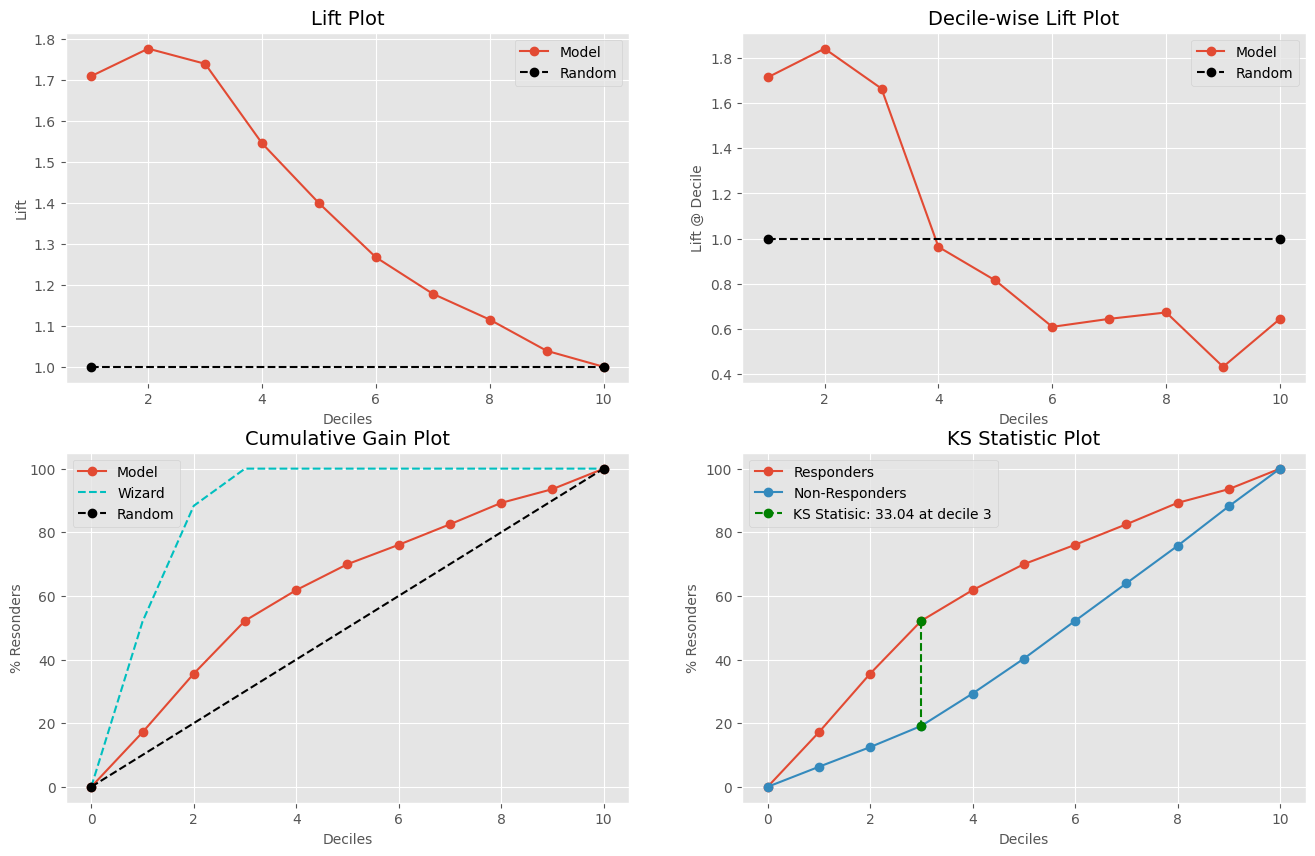

In [47]:
# calculate probabilities using the model
y_valid_prob = NN_model.predict(X_valid_std)

# cetrics report using kds.metrics.report
metrics.report(y_valid, y_valid_prob[:, 1], plot_style='ggplot')

## **Ensemble Method**

In [48]:
# target models for ensemble

lr_pred = lr_CV.predict(X_test)
nn_pred = NN_model.predict(X_test)
y_pred_labels2 = nn_pred.argmax(axis=1)
stacked_predictions = np.column_stack((predictions_rf, lr_pred, y_pred_labels2))

86/86 [==============================] - 0s 1ms/step


In [49]:
# Split the stacked predictions for meta-model training and validation
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(stacked_predictions, y_test, test_size=0.2, random_state=42)

# train ensemble model
meta_model = LogisticRegression()
meta_model.fit(X_train_meta, y_train_meta)

meta_pred = meta_model.predict(X_val_meta)

# measure accuracy
meta_model_score = meta_model.score(X_val_meta, y_val_meta)
print(f"Meta-model accuracy: {meta_model_score:.4f}")

#accuracy_score(y_val_meta, meta_pred)
classification_report(y_val_meta, meta_pred)

Meta-model accuracy: 0.8566


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

'              precision    recall  f1-score   support\n\n           0       0.86      0.97      0.91       403\n           1       0.00      0.00      0.00        48\n           2       0.82      0.80      0.81        64\n           3       0.84      0.89      0.86        36\n\n    accuracy                           0.86       551\n   macro avg       0.63      0.66      0.65       551\nweighted avg       0.78      0.86      0.82       551\n'

### Table

In [50]:
metrics_dict = {
    "Random Forest": [accuracy_score(y_test, predictions_rf)],#, precision_score(y_test, predictions_rf), recall_score(y_test, predictions_rf), f1_score(y_test, predictions_rf)],
    "Logistic": [accuracy_score(y_valid,lr_CV_pred)],#, precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)],
    "Neural Network": [accuracy_score(y_valid, y_pred_labels)],#, precision_score(y_test, y_pred_nn), recall_score(y_test, y_pred_nn), f1_score(y_test, y_pred_nn)],
    "Ensemble Method": [accuracy_score(y_val_meta, meta_pred)]#, precision_score(y_test, ensemble_predictions), recall_score(y_test, ensemble_predictions), f1_score(y_test, ensemble_predictions)],
}
# Create DataFrame from dictionary
df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Accuracy'])
df = df.round(3)
print(df)

                 Accuracy
Random Forest       0.919
Logistic            0.680
Neural Network      0.626
Ensemble Method     0.857


## **Random Forest** dominates as it is by far the best model.
